In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


import scipy.interpolate as interp
#import lalsimulation as lal
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
import keras
from keras import metrics
import keras_metrics as km
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers 
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from  IPython import display
from matplotlib import pyplot as plt
import pathlib 
import shutil
import tempfile
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
#gpu configuration:

gpu_num = 0

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_visible_devices(gpus[gpu_num], 'GPU')
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")


2 Physical GPUs, 2 Logical GPUs
Visible devices cannot be modified after being initialized


In [34]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor


In [35]:
df = pd.read_csv('polynomial3.csv')

In [36]:
df = df.iloc[:8000]
train_dataset = df.sample(frac=0.8, random_state=1)
test_dataset = df.drop(train_dataset.index)

In [37]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [38]:
train_featuress = train_features.drop(columns = ['a', 'b', 'c', 'd'])
test_featuress = test_features.drop(columns = ['a', 'b', 'c', 'd'])

In [39]:
train_labels = train_features.drop(columns = ['x1', 'y1', 'x2', 'y2'])
test_labels = test_features.drop(columns = ['x1', 'y1', 'x2', 'y2'])

In [40]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
from sklearn.multioutput import MultiOutputRegressor


In [71]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [72]:
poly_features = poly.fit_transform(train_featuress)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
poly_reg_model = MultiOutputRegressor(LinearRegression())


In [75]:
ploymodel = poly_reg_model.fit(poly_features, train_labels)

In [76]:
pred = ploymodel.predict(poly_features)

In [77]:
predictions_array_length = len(pred[:,[0]])
#predictions_array_length = len(test_predictions[:,0])
numcols = 4
predictions_columns = [
    'a', 'b', 
    'c', 'd', 
]
predictions = pd.DataFrame(np.zeros((predictions_array_length, numcols)), columns=predictions_columns)
for i, col in enumerate(predictions_columns):
    predictions[col] = pred[:, i]

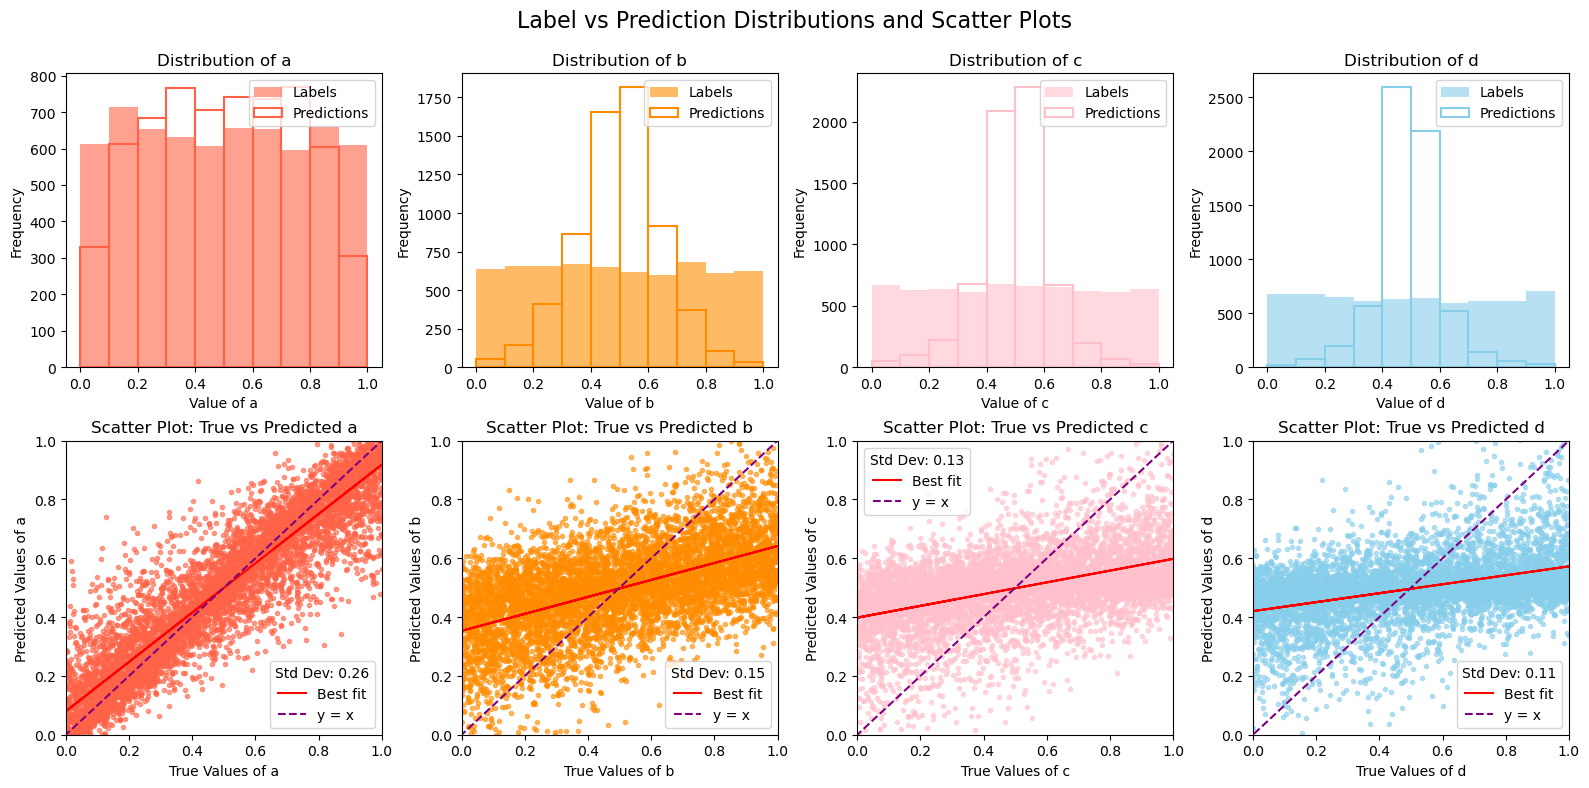

In [78]:
def plot_distributions_and_scatter(labels_df, predictions, labels_columns, colors=None, scatter_xyrange=None, dist_xrange=None):
    num_outputs = len(labels_columns)
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))  
    
    if colors is None:
        colors = ['tomato', 'darkorange', 'pink', 'skyblue', 'darkblue', 'green', 'purple', 'brown']
        
    for i, label in enumerate(labels_columns):
        color = colors[i % len(colors)]

        axs[0, i].hist(labels_df[label], color=color, alpha=0.6, label="Labels", range=(np.min(labels_df[label]), np.max(labels_df[label])))
        axs[0, i].hist(predictions[label], edgecolor=color, fill=False, linewidth=1.5, label="Predictions", range=(np.min(labels_df[label]), np.max(labels_df[label])))
        axs[0, i].set_title(f"Distribution of {label}")
        axs[0, i].set_xlabel(f"Value of {label}")
        axs[0, i].set_ylabel("Frequency")
        axs[0, i].legend()
        

        axs[1, i].scatter(labels_df[label], predictions[label], marker='.', color=color, alpha=0.6)
        slope, intercept = np.polyfit(labels_df[label], predictions[label], 1)
        axs[1, i].plot(labels_df[label], slope * labels_df[label] + intercept, color='red', label='Best fit')
        
        if scatter_xyrange:
            axs[1, i].set_xlim(scatter_xyrange)
            axs[1, i].set_ylim(scatter_xyrange)

        min_val = min(np.min(labels_df[label]), np.min(predictions[label]))
        max_val = max(np.max(labels_df[label]), np.max(predictions[label]))
        axs[1, i].plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='--', label='y = x')

        std_dev = np.std(predictions[label])
        axs[1, i].set_title(f"Scatter Plot: True vs Predicted {label}")
        axs[1, i].set_xlabel(f"True Values of {label}")  
        axs[1, i].set_ylabel(f"Predicted Values of {label}")
        axs[1, i].legend(title=f'Std Dev: {std_dev:.2f}')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    fig.suptitle('Label vs Prediction Distributions and Scatter Plots', fontsize=16)
    plt.show()


labels_columns = ['a', 'b', 'c', 'd'] 

labels_df = train_labels  
plot_distributions_and_scatter(labels_df, predictions[['a', 'b', 'c', 'd']], labels_columns, scatter_xyrange=(0, 1))

#plot_distributions_and_scatter(labels_df, predictions[['a', 'b', 'c', 'd']], ['a', 'b', 'c', 'd'], scatter_xyrange=(0, 1))


params ={ 
    'kernel': 'poly',
    'tol': 1e-06,
    'gamma': 'auto',
    'epsilon':0.01,
    'C': 1, 
    'verbose': 1,
    'coef0': 2, 
    'degree':3,
}

train_labelss = train_labels.values.ravel() #predicting just b 

svr = SVR(**params)

svr_regr = svr.fit(train_featuress, train_labelss)

test_predictions = svr_regr.predict(train_featuress)

len(test_predictions)

len(train_labelss)

pred_max = test_predictions.max()
pred_min = test_predictions.min()
pred_range = pred_max - pred_min
pred_mean = test_predictions.mean()
print(pred_max, pred_min, pred_range, pred_mean)